<a href="https://www.kaggle.com/code/armaghanbinzahid/alzeihmer-detection?scriptVersionId=142207221" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

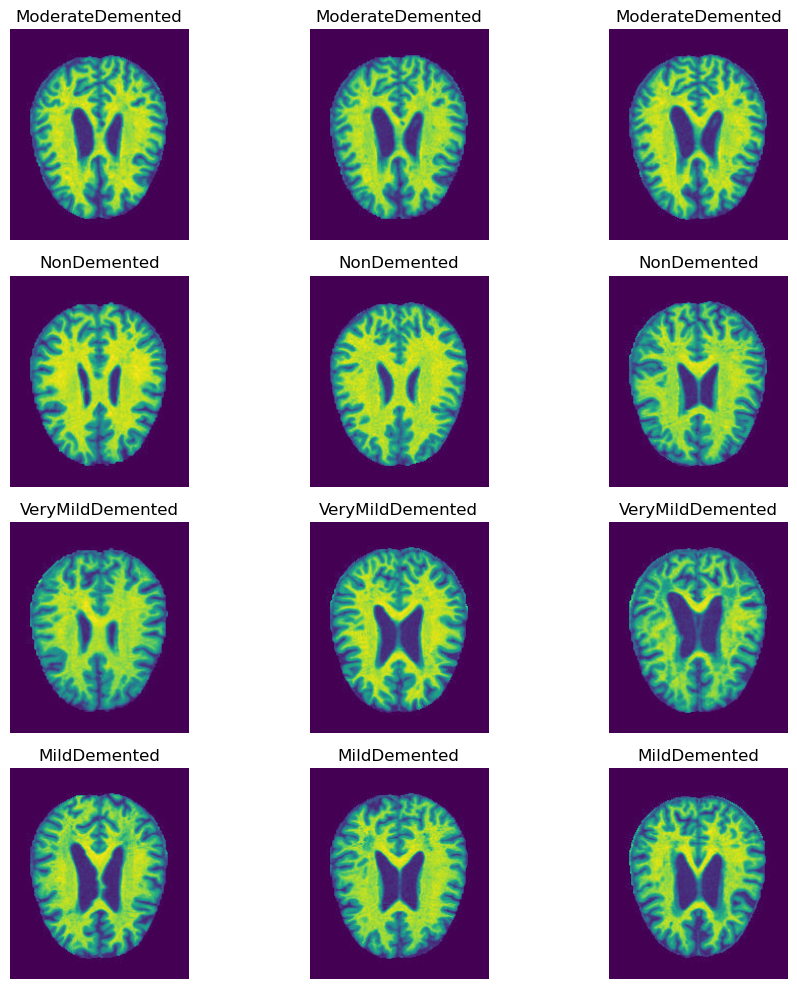

In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
test_folder = '/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test'
class_names = os.listdir(test_folder)
num_images_per_class = 3

plt.figure(figsize=(10, 10))

for class_name in class_names:
    class_folder = os.path.join(test_folder, class_name)
    image_files = os.listdir(class_folder)[:num_images_per_class]
    
    for image_file in image_files:
        image_path = os.path.join(class_folder, image_file)
        image = mpimg.imread(image_path)
        
        plt.subplot(len(class_names), num_images_per_class, class_names.index(class_name) * num_images_per_class + image_files.index(image_file) + 1)
        plt.imshow(image)
        plt.title(class_name)
        plt.axis('off')

plt.tight_layout()
plt.show()


In [2]:
main_folder = '/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset'

# List of subfolders (train and test)
subfolders = ['train', 'test']

for subfolder in subfolders:
    subfolder_path = os.path.join(main_folder, subfolder)
    class_names = os.listdir(subfolder_path)
    
    print(f"Number of images in {subfolder} folder:")
    
    for class_name in class_names:
        class_folder = os.path.join(subfolder_path, class_name)
        num_images = len(os.listdir(class_folder))
        print(f"Class {class_name}: {num_images} images")
    
    print("-" * 20)

Number of images in train folder:
Class ModerateDemented: 52 images
Class NonDemented: 2560 images
Class VeryMildDemented: 1792 images
Class MildDemented: 717 images
--------------------
Number of images in test folder:
Class ModerateDemented: 12 images
Class NonDemented: 640 images
Class VeryMildDemented: 448 images
Class MildDemented: 179 images
--------------------


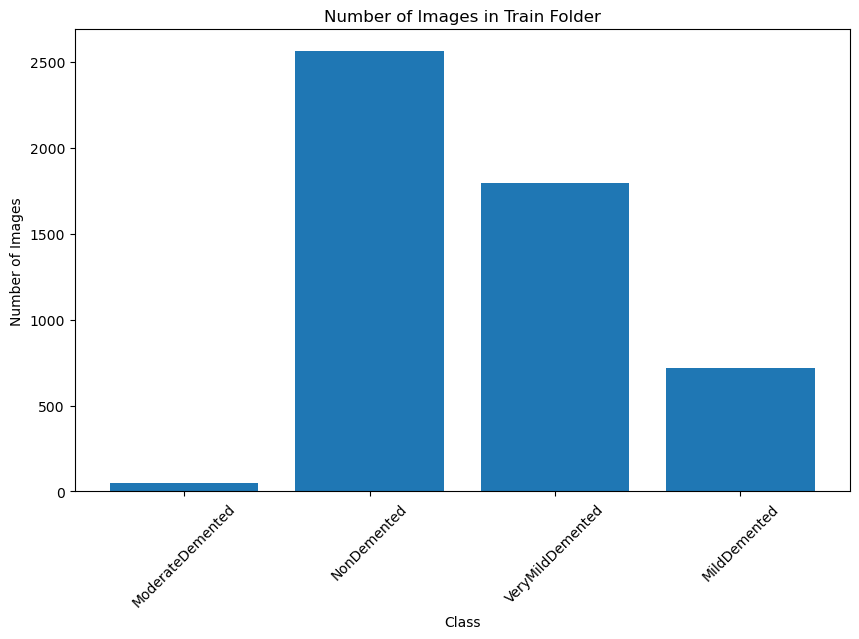

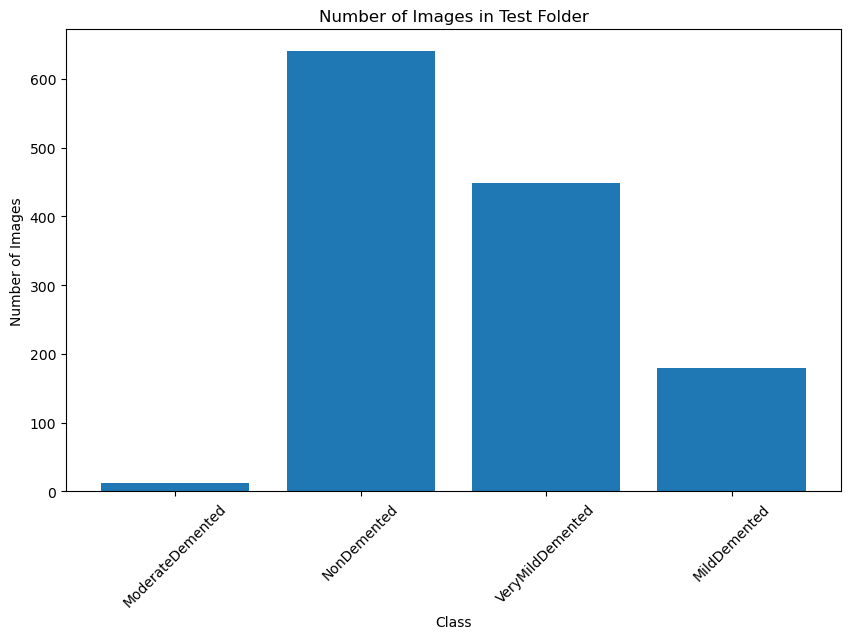

In [3]:
for subfolder in subfolders:
    subfolder_path = os.path.join(main_folder, subfolder)
    class_names = os.listdir(subfolder_path)
    class_counts = []
    
    for class_name in class_names:
        class_folder = os.path.join(subfolder_path, class_name)
        num_images = len(os.listdir(class_folder))
        class_counts.append(num_images)
    
    plt.figure(figsize=(10, 6))
    plt.bar(class_names, class_counts)
    plt.title(f"Number of Images in {subfolder.capitalize()} Folder")
    plt.xlabel("Class")
    plt.ylabel("Number of Images")
    plt.xticks(rotation=45)
    plt.show()

In [4]:
from PIL import Image

In [5]:
image_path = '/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/MildDemented/26 (19).jpg'

# Open the image and get its size
image = Image.open(image_path)
image_size = image.size

print(f"Image: {image_path} | Size: {image_size[0]} x {image_size[1]}")

Image: /kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/MildDemented/26 (19).jpg | Size: 176 x 208


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
import numpy as np

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [7]:
# Path to the train dataset folder
train_folder = '/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train'

# List of class names
class_names = os.listdir(train_folder)

# Image dimensions
image_width, image_height = 128, 128

# Load and preprocess the images
data = []
labels = []

for class_index, class_name in enumerate(class_names):
    class_folder = os.path.join(train_folder, class_name)
    for image_file in os.listdir(class_folder):
        image_path = os.path.join(class_folder, image_file)
        image = Image.open(image_path).convert("L")  # Convert to grayscale
        image = image.resize((image_width, image_height))
        image = np.array(image) / 255.0  # Normalize pixel values
        data.append(image)
        labels.append(class_index)

data = np.array(data)
labels = np.array(labels)

In [8]:
print(len(class_names))

4


In [9]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_width, image_height, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')
])


In [10]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


Epoch 1/10
128/128 [==============================] - 67s 513ms/step - loss: 1.0211 - accuracy: 0.5078 - val_loss: 0.9011 - val_accuracy: 0.5707
Epoch 2/10
128/128 [==============================] - 65s 507ms/step - loss: 0.8907 - accuracy: 0.5750 - val_loss: 0.8368 - val_accuracy: 0.6185
Epoch 3/10
128/128 [==============================] - 64s 503ms/step - loss: 0.8172 - accuracy: 0.6196 - val_loss: 0.7273 - val_accuracy: 0.6732
Epoch 4/10
128/128 [==============================] - 66s 514ms/step - loss: 0.7172 - accuracy: 0.6655 - val_loss: 0.6345 - val_accuracy: 0.7171
Epoch 5/10
128/128 [==============================] - 68s 533ms/step - loss: 0.5752 - accuracy: 0.7476 - val_loss: 0.4971 - val_accuracy: 0.7971
Epoch 6/10
128/128 [==============================] - 66s 516ms/step - loss: 0.4430 - accuracy: 0.8110 - val_loss: 0.3509 - val_accuracy: 0.8761
Epoch 7/10
128/128 [==============================] - 66s 518ms/step - loss: 0.3081 - accuracy: 0.8770 - val_loss: 0.1928 - val_ac

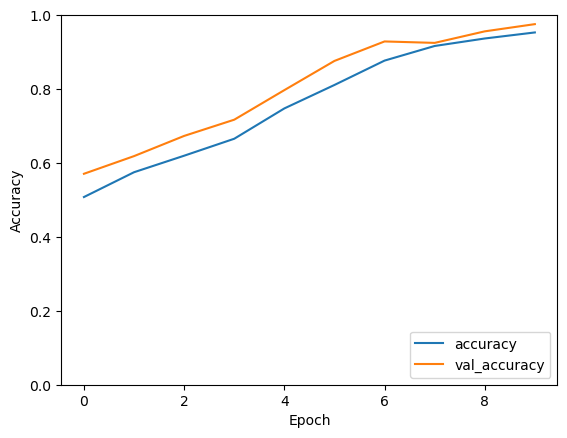

In [11]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

In [13]:
# Path to the test dataset folder
test_folder = '/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test'

# Load and preprocess the test images
test_data = []
test_labels = []

for class_index, class_name in enumerate(class_names):
    class_folder = os.path.join(test_folder, class_name)
    for image_file in os.listdir(class_folder):
        image_path = os.path.join(class_folder, image_file)
        image = Image.open(image_path).convert("L")  # Convert to grayscale
        image = image.resize((image_width, image_height))
        image = np.array(image) / 255.0  # Normalize pixel values
        test_data.append(image)
        test_labels.append(class_index)

test_data = np.array(test_data)
test_labels = np.array(test_labels)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_data, test_labels, verbose=2)

print(f"Test accuracy: {test_accuracy:.4f}")


40/40 - 5s - loss: 1.4560 - accuracy: 0.6638 - 5s/epoch - 126ms/step
Test accuracy: 0.6638
